In [1]:
#loading libaries

!pip install eli5
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
os.chdir('C:/Users/spoorthi/Desktop/project2')
os.getcwd()

'C:\\Users\\spoorthi\\Desktop\\project2'

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(200000, 202)

In [5]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
test.shape

(200000, 201)

In [7]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [8]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [10]:
train.dtypes


ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [11]:
test.dtypes

ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [12]:
#Finding the missing values in train & test dataset:-
train_missing=train.isnull().sum().sum()
test_missing=test.isnull().sum().sum()

print('Missing values in train data:',train_missing)
print('Missing values in test data:',test_missing)

Missing values in train data: 0
Missing values in test data: 0


In [13]:
# Outlier Analysis
df = train.copy()

In [14]:
#Target Class Count
target_class=df['target'].value_counts()
print('Count of the target class :\n',target_class)

#Percentage of target class count
per_target_class=df['target'].value_counts()/len(df)*100
print('Percentage of target class count :\n',per_target_class)

Count of the target class :
 0    179902
1     20098
Name: target, dtype: int64
Percentage of target class count :
 0    89.951
1    10.049
Name: target, dtype: float64


In [15]:
# Data Preprocessiing

# Remove outliers
train_x = train.iloc[:, 1:]
IQR = train_x.quantile(.75) - train_x.quantile(.25)
print("Train.shape:",train.shape)
df_in = train[~((train_x < (train_x.quantile(.25) - 1.5 * IQR)) |(train_x > (train_x.quantile(.75) + 1.5 * IQR))).any(axis=1)]
df_out = train[((train_x < (train_x.quantile(.25) - 1.5 * IQR)) |(train_x > (train_x.quantile(.75) + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)

Train.shape: (200000, 202)
df_in.shape: (157999, 202)
df_out.shape: (42001, 202)


In [16]:
print("df_in.target:\n", df_in['target'].value_counts())
print("df_out.target:\n", df_out['target'].value_counts())

df_in.target:
 0    157999
Name: target, dtype: int64
df_out.target:
 0    21903
1    20098
Name: target, dtype: int64


In [17]:
df_in['target'].value_counts()

0    157999
Name: target, dtype: int64

In [18]:
df_out['target'].value_counts()

0    21903
1    20098
Name: target, dtype: int64

In [19]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

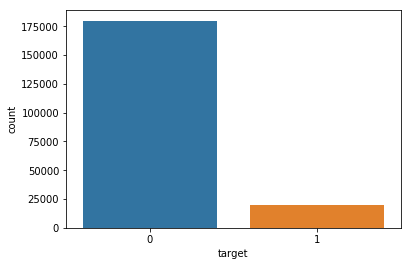

In [20]:
sns.countplot(df['target'])

In [21]:

# Looking Variance
print('Train Variance:\n',train.var(),'\nTest Variance:\n', test.var())

Train Variance:
 target       0.090392
var_0        9.241909
var_1       16.402858
var_2        6.974322
var_3        4.175153
var_4        2.634614
var_5       61.830963
var_6        0.751008
var_7       11.683241
var_8       11.106446
var_9        1.525398
var_10      30.258724
var_11      35.643922
var_12       0.036123
var_13      21.525290
var_14       5.053091
var_15       0.169506
var_16       6.540402
var_17      45.059166
var_18      61.644015
var_19      63.947112
var_20      34.530360
var_21      67.183656
var_22       8.110864
var_23       0.277617
var_24      14.267582
var_25       0.081530
var_26      35.072569
var_27       2.321705
var_28       0.613664
              ...    
var_170     19.577270
var_171     28.922975
var_172     75.241236
var_173     35.601200
var_174     50.928585
var_175      8.364631
var_176     56.459280
var_177      6.911087
var_178     73.613144
var_179      7.834157
var_180     27.680674
var_181      1.882006
var_182     80.343150
var_183     20.

In [22]:
# Looking Skewness
print('Train skewness:\n',train.skew(),'\nTest skewness:\n', test.skew())

Train skewness:
 target     2.657642
var_0      0.235639
var_1      0.053115
var_2      0.260313
var_3     -0.003548
var_4     -0.048210
var_5     -0.002038
var_6      0.149476
var_7      0.084598
var_8     -0.104643
var_9     -0.175433
var_10    -0.056716
var_11     0.070549
var_12    -0.143664
var_13    -0.176897
var_14     0.038347
var_15     0.035511
var_16     0.191968
var_17    -0.053671
var_18     0.088625
var_19     0.050517
var_20     0.059918
var_21    -0.001675
var_22     0.156611
var_23     0.062952
var_24     0.142217
var_25     0.175815
var_26     0.172770
var_27     0.020910
var_28    -0.041626
             ...   
var_170    0.102994
var_171    0.014630
var_172    0.035405
var_173   -0.056174
var_174   -0.115756
var_175    0.139967
var_176   -0.069876
var_177    0.120944
var_178   -0.007879
var_179    0.242891
var_180    0.061788
var_181    0.205355
var_182   -0.003947
var_183    0.075521
var_184    0.144640
var_185   -0.035737
var_186    0.104702
var_187   -0.021180
var

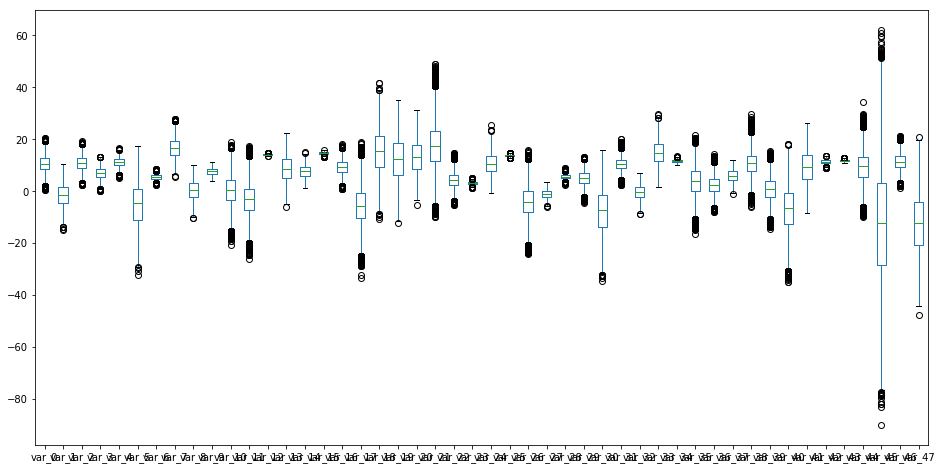

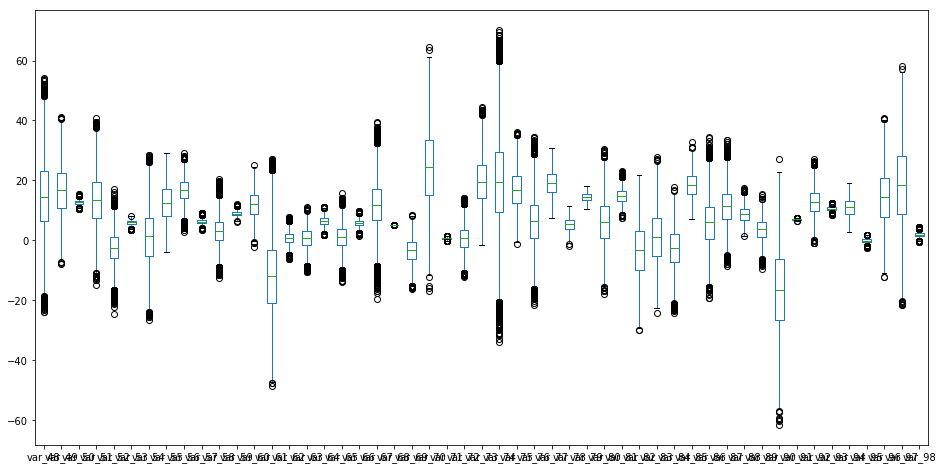

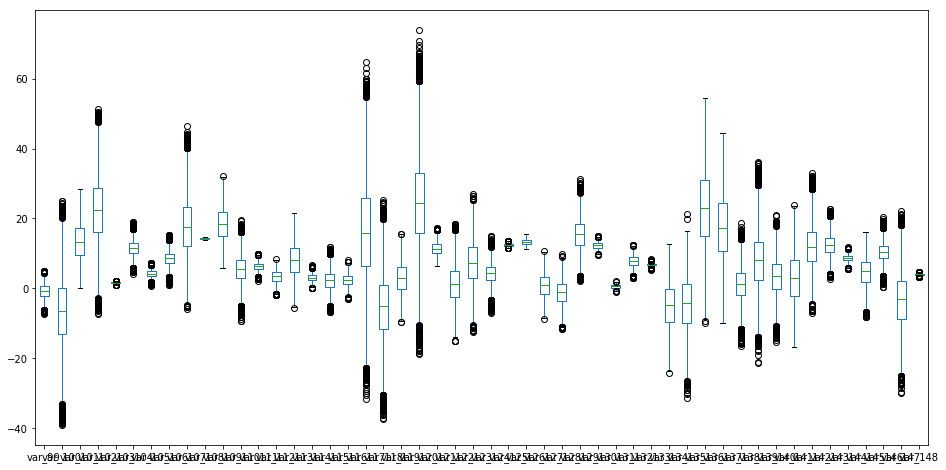

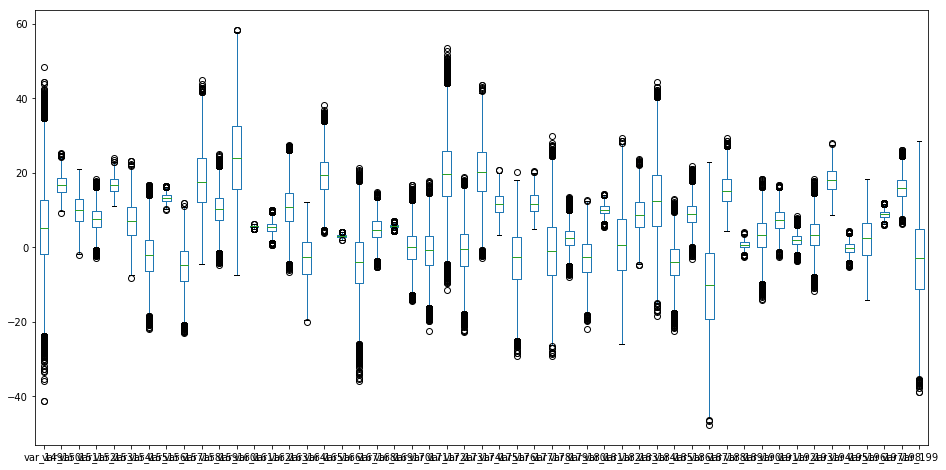

In [23]:
# Boxplot Analysis
# Plot  features.
train.iloc[:, 2:50].plot(kind='box', figsize=[16,8])
train.iloc[:, 50:101].plot(kind='box', figsize=[16,8])
train.iloc[:, 101:151].plot(kind='box', figsize=[16,8])
train.iloc[:, 151:].plot(kind='box', figsize=[16,8])

In [24]:
# Distribution plot Analysis

# Function for quick plot of distribution
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show() 
    
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]

<Figure size 432x288 with 0 Axes>

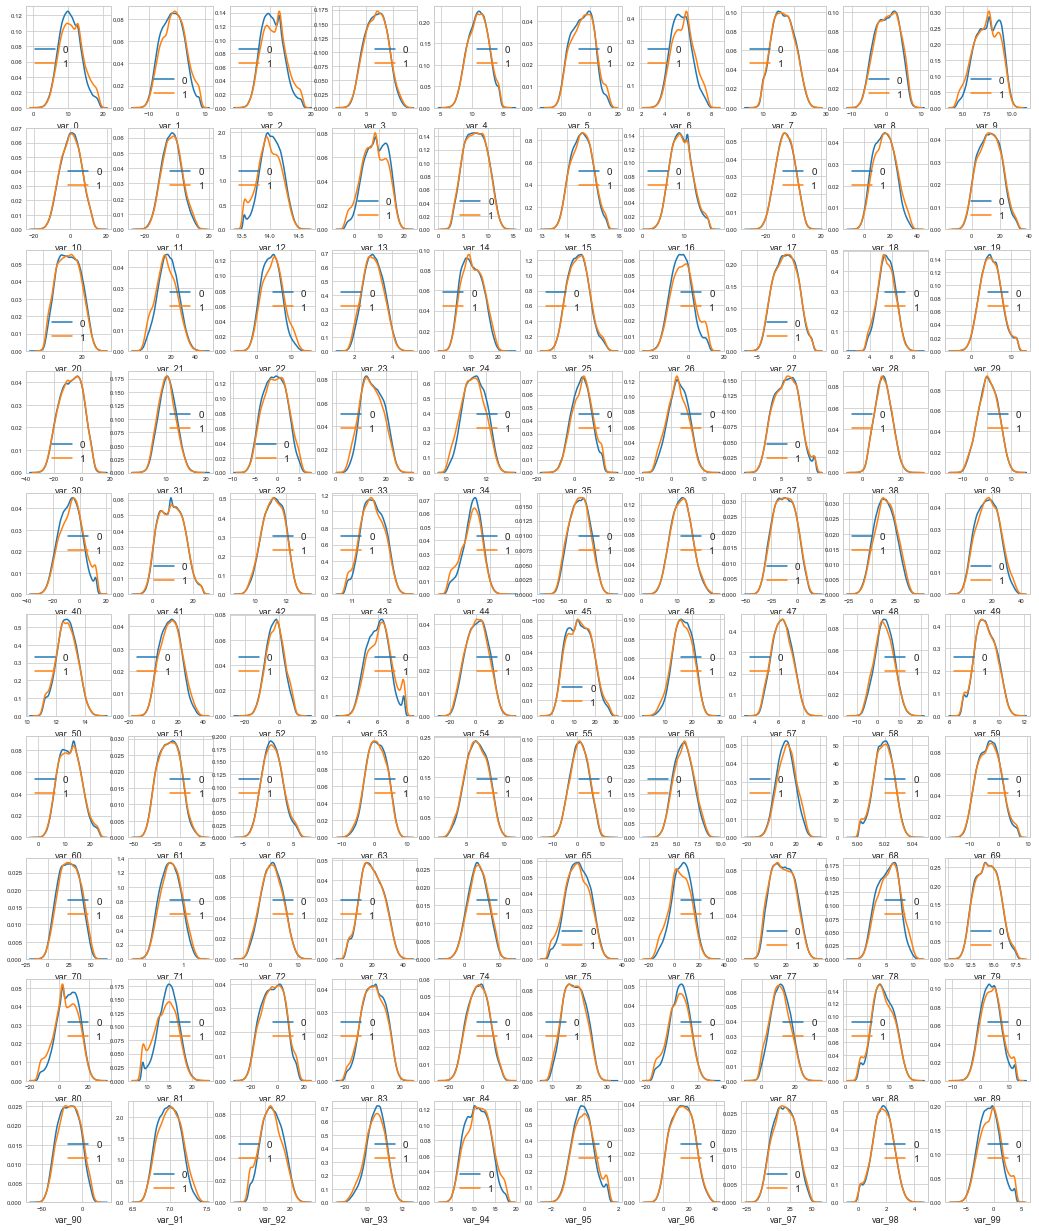

<Figure size 432x288 with 0 Axes>

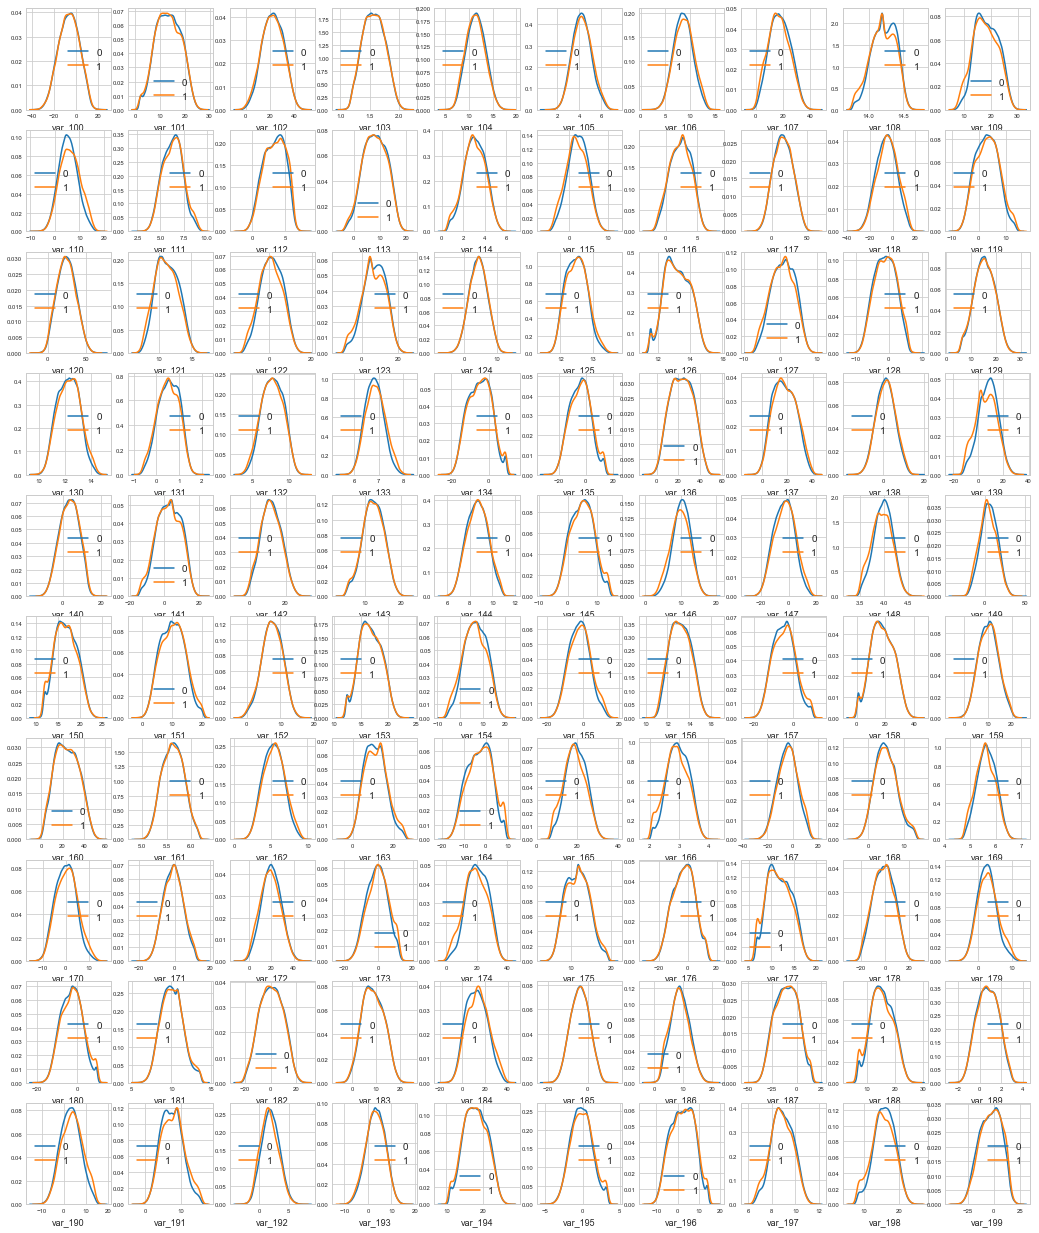

In [25]:
# First 100 features dustribution
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

# Rest 100 features dustribution
features = train.columns.values[102:]
plot_feature_distribution(t0, t1, '0', '1', features)

In [26]:
#Distribution of test attributes

def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

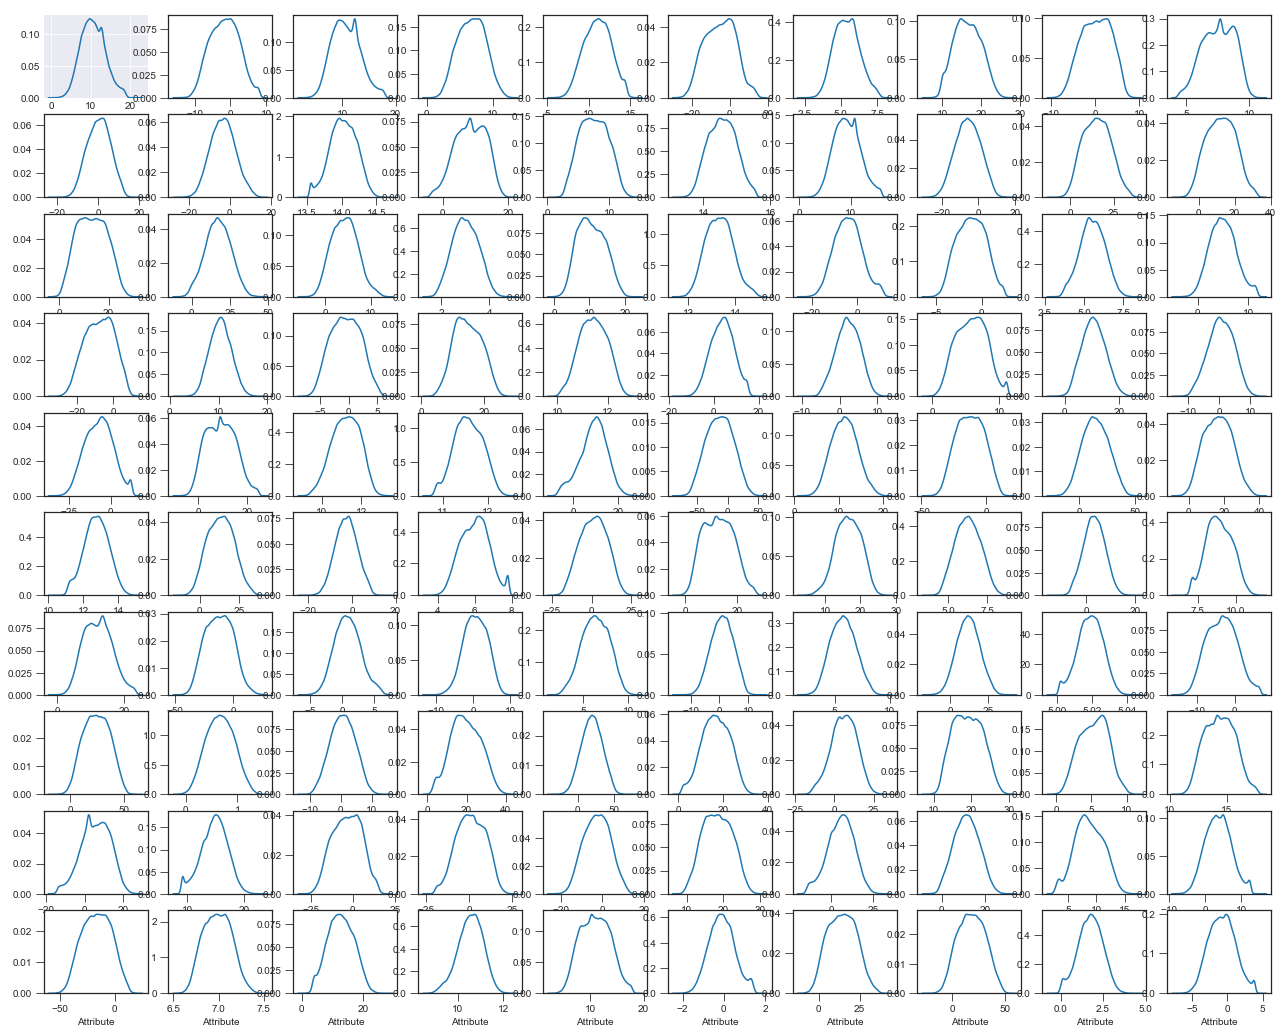

In [27]:
#test attribiutes from 1 to 101 -
test_attributes=test.columns.values[1:101]

#Plot distribution of test attributes -
plot_test_attribute_distribution(test_attributes)

<Figure size 432x288 with 0 Axes>

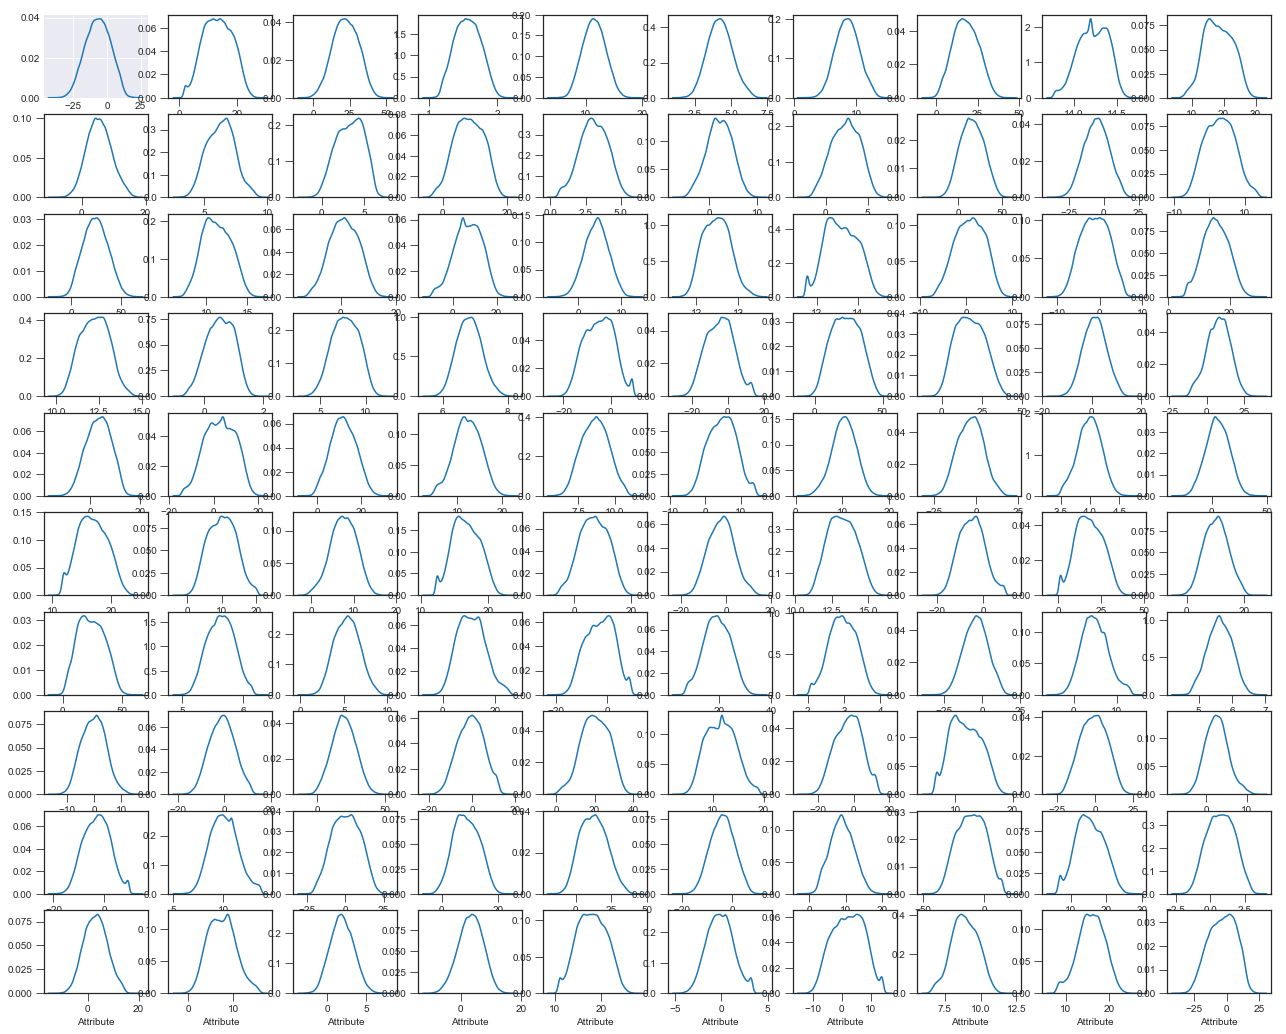

In [28]:
#test attributes from 101 to 202-
test_attributes=test.columns.values[101:202]

#Plot the distribution of test attributes-
plot_test_attribute_distribution(test_attributes)

<Figure size 432x288 with 0 Axes>

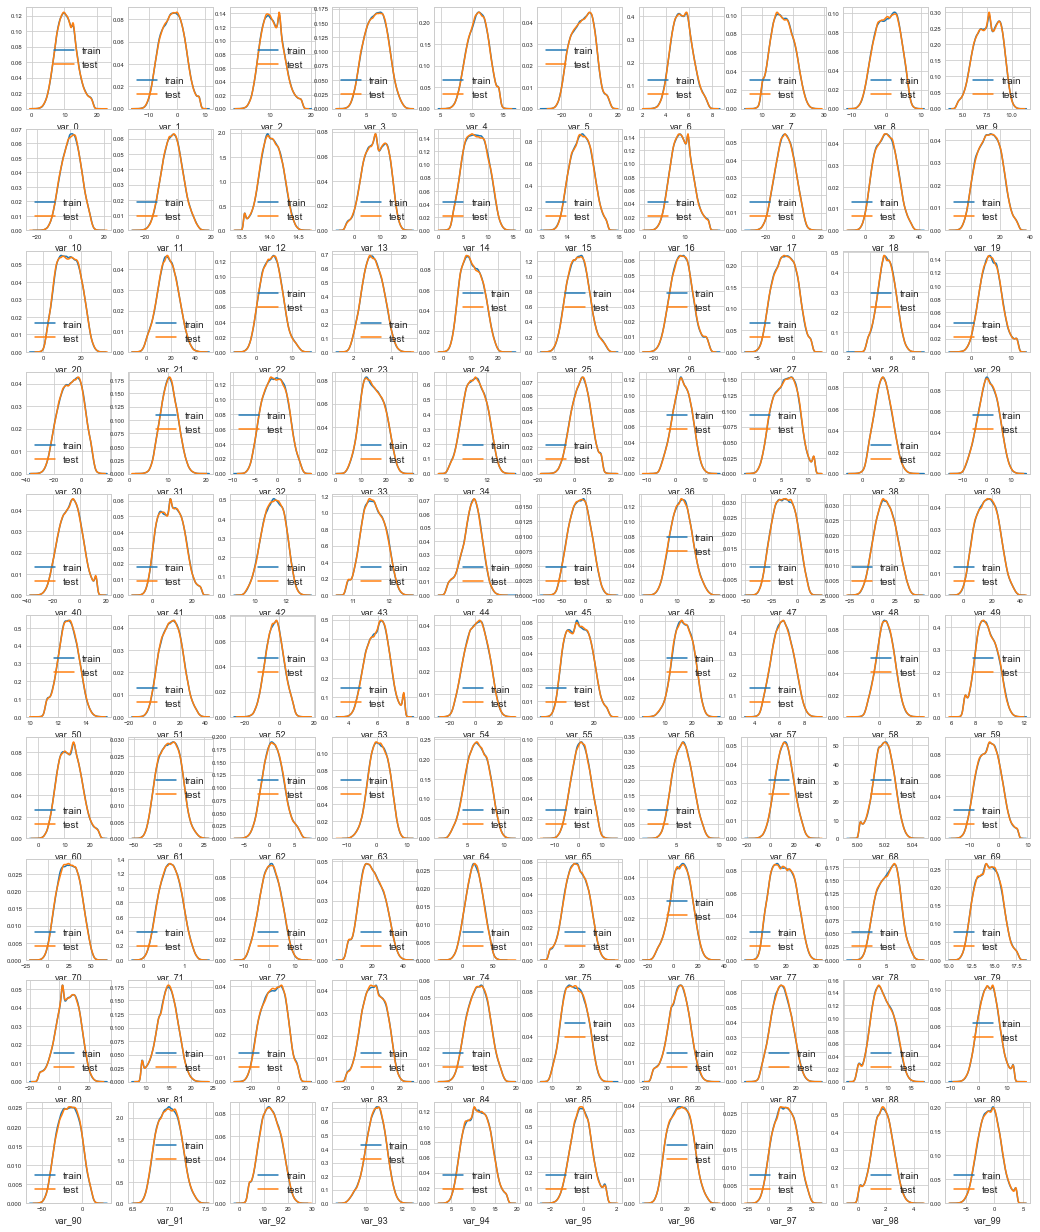

In [29]:
features = train.columns.values[2:102]
plot_feature_distribution(train, test, 'train', 'test', features)

<Figure size 432x288 with 0 Axes>

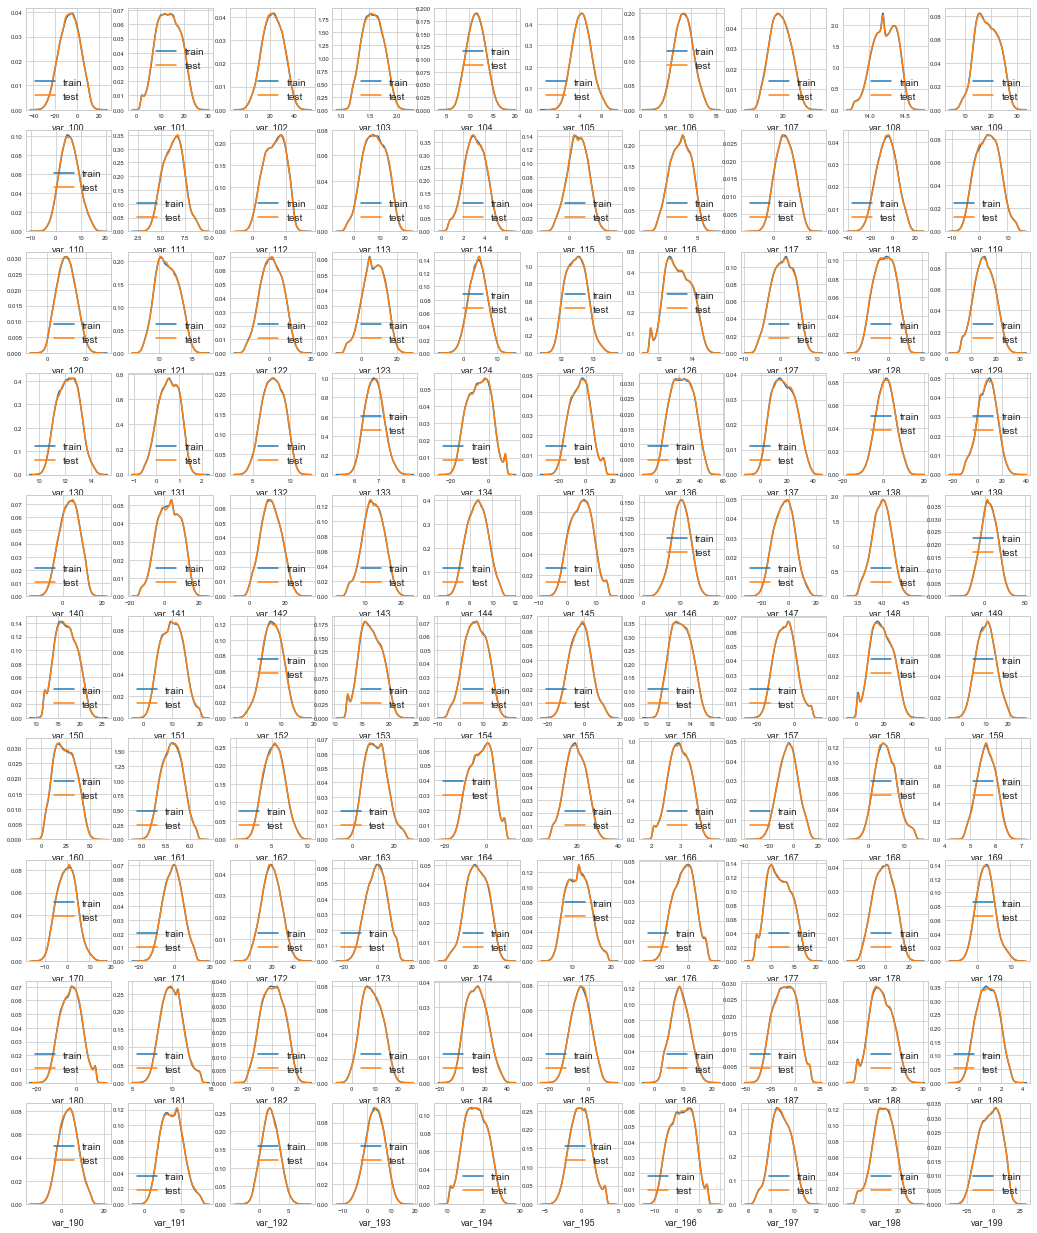

In [30]:

features = train.columns.values[102:202]
plot_feature_distribution(train, test, 'train', 'test', features)

C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


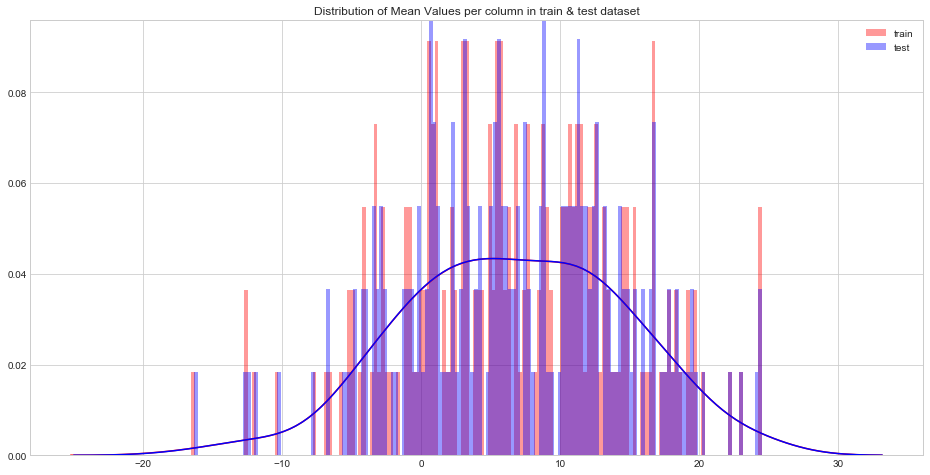

C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


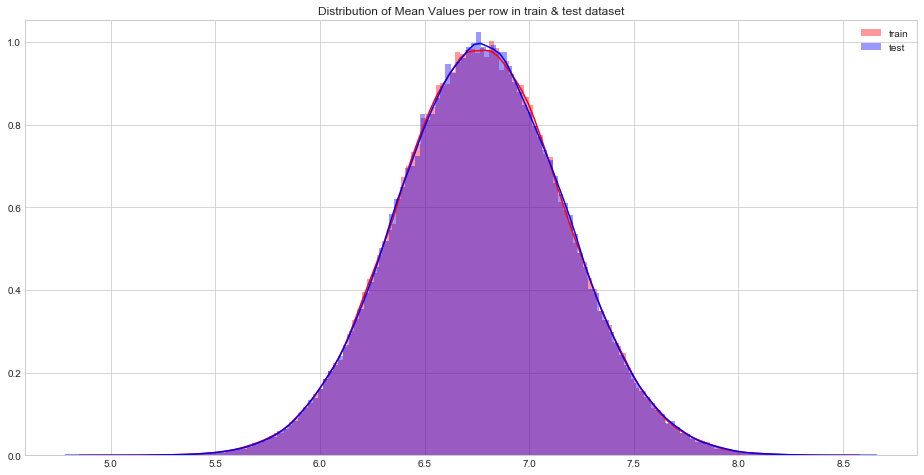

In [31]:
#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train.columns.values[2:202]

#Test attributes-
test_attributes=test.columns.values[1:201]

#Distribution plot for mean values per column in train attributes:
sns.distplot(train[train_attributes].mean(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per column in test attributes:
sns.distplot(test[test_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for mean values per rows in train attributes:
sns.distplot(train[train_attributes].mean(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per rows in test attributes:
sns.distplot(test[test_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per row in train & test dataset')
plt.legend()
plt.show()

C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


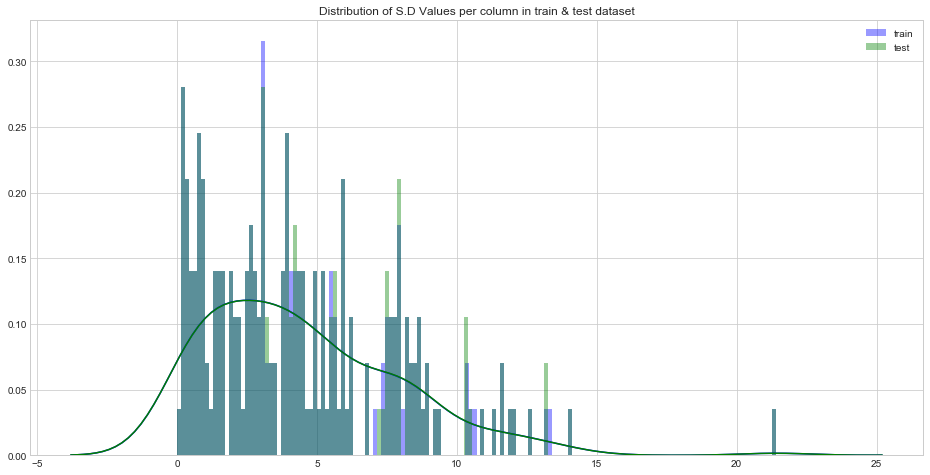

C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


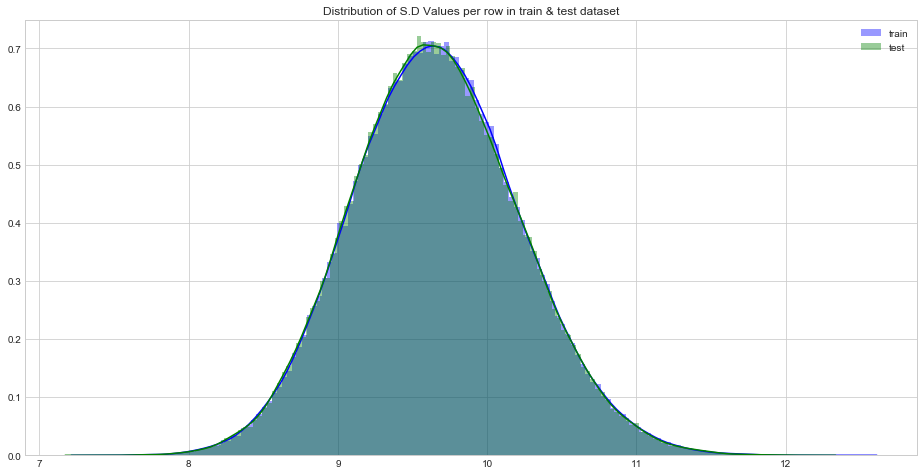

In [32]:
#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train.columns.values[2:202]

#Test attributes-
test_attributes=test.columns.values[1:201]

#Distribution plot for S.D values per column in train attributes:
sns.distplot(train[train_attributes].std(axis=0),color='blue',kde=True,bins=150,label='train')

#Distribution plot for S.D values per column in test attributes:
sns.distplot(test[test_attributes].std(axis=0),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of S.D Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for S.D values per rows in train attributes:
sns.distplot(train[train_attributes].std(axis=1),color='blue',kde=True,bins=150,label='train')

#Distribution plot for S.D values per rows in test attributes:
sns.distplot(test[test_attributes].std(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of S.D Values per row in train & test dataset')
plt.legend()
plt.show()

C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


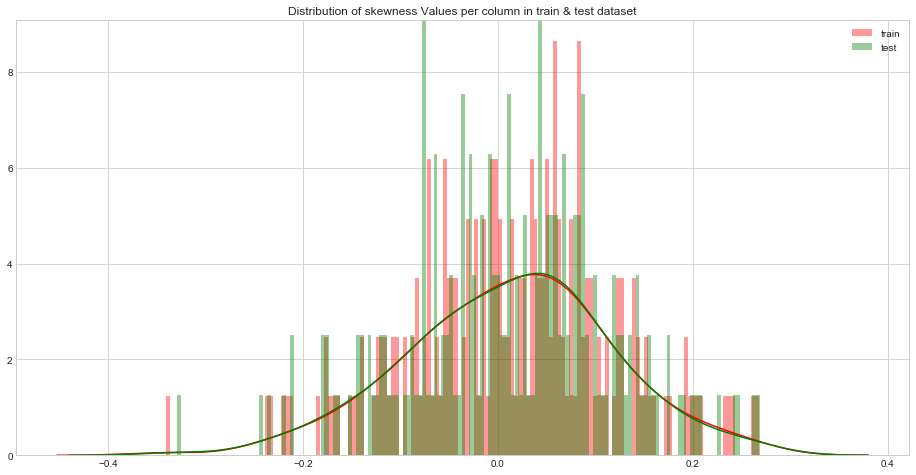

C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


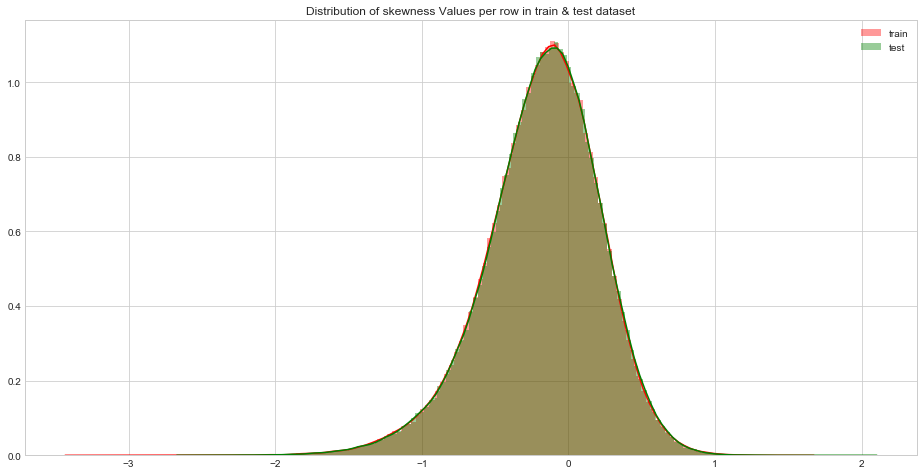

In [33]:
#Distribution of skew Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train.columns.values[2:202]

#Test attributes-
test_attributes=test.columns.values[1:201]

#Distribution plot for skew values per column in train attributes:
sns.distplot(train[train_attributes].skew(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for skew values per column in test attributes:
sns.distplot(test[test_attributes].skew(axis=0),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of skewness Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of skew Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for skew values per rows in train attributes:
sns.distplot(train[train_attributes].skew(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for skew values per rows in test attributes:
sns.distplot(test[test_attributes].skew(axis=1),color='green',kde=True,bins=150,label='test')

plt.title('Distribution of skewness Values per row in train & test dataset')
plt.legend()
plt.show()

In [34]:
#Correlation in test attiributes-
test_attributes=test.columns.values[1:201]
test_correlation=test[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlation=test_correlation[test_correlation['level_0']!=test_correlation['level_1']]
print(test_correlation.head(10))
print(test_correlation.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868


In [35]:
# Correlation Analysis
data_corr=train.drop(['target','ID_code'], axis=1).corr()
print('Maximum corr within all variables correlations :',np.sort(train.drop(['target','ID_code'], axis=1).corr())[:,-2:-1].max())

Maximum corr within all variables correlations : 0.009713658349534146


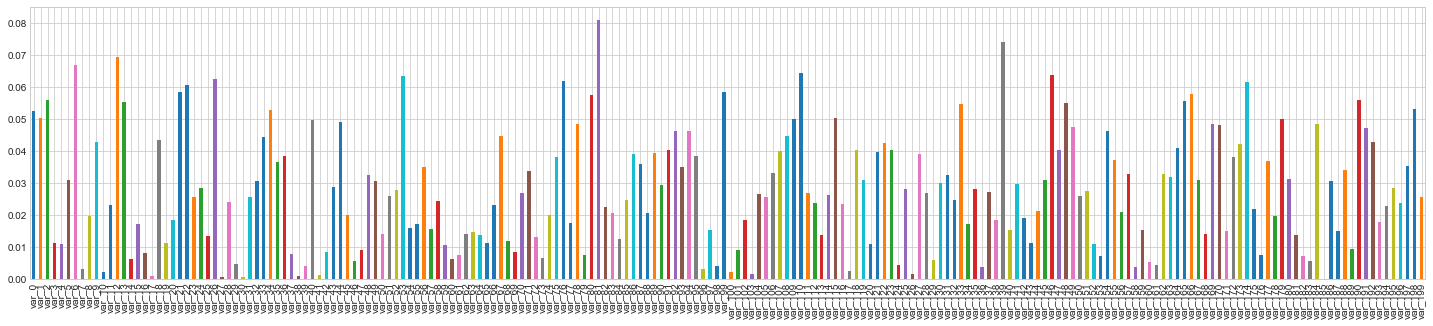

In [36]:
target_r2 = train.drop(['ID_code', 'target'], axis=1).corrwith(train.target).agg('square')

f, ax = plt.subplots(figsize=(25,5))
target_r2.agg('sqrt').plot.bar(ax=ax)

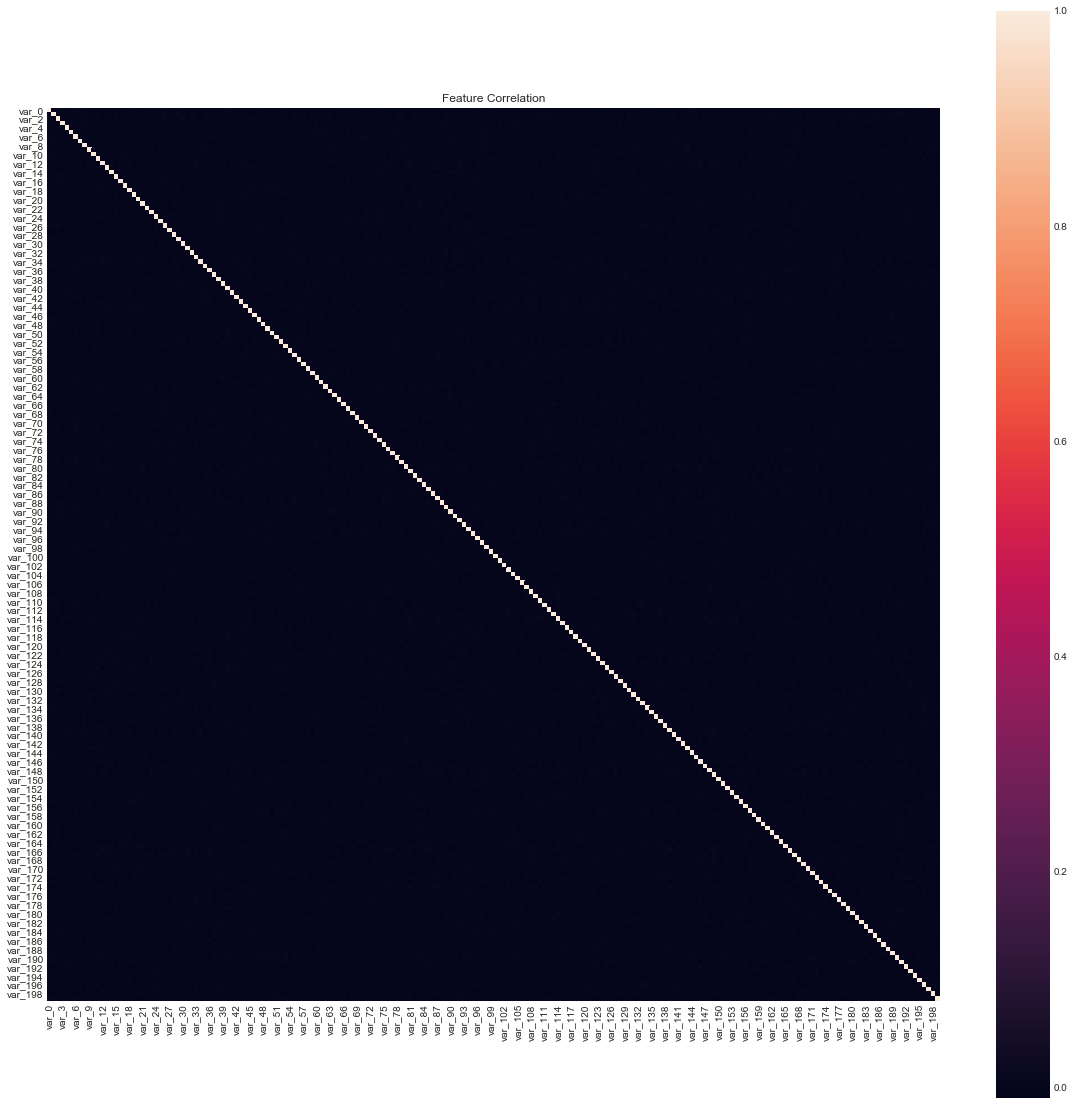

In [37]:

# Correlation Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, square=True)
plt.title('Feature Correlation')
plt.show()

C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spoorthi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


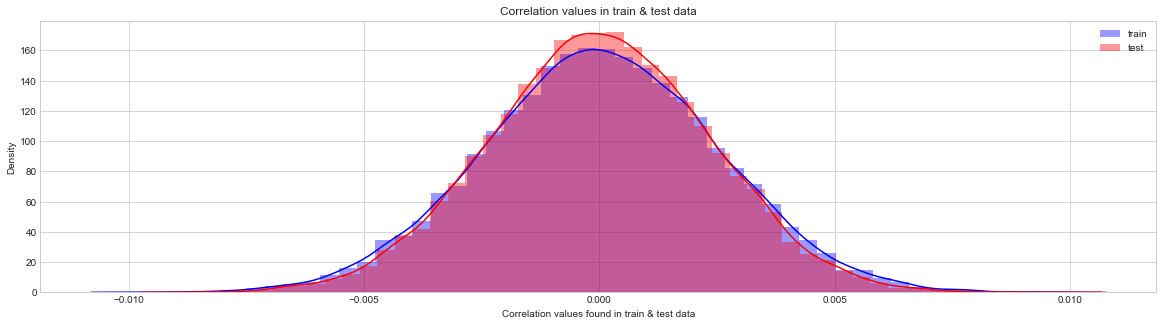

In [38]:
train_correlation=train[train_attributes].corr()
train_correlation=train_correlation.values.flatten()
train_correlation=train_correlation[train_correlation!=1]


test_correlation=test[test_attributes].corr()
test_correlation=test_correlation.values.flatten()
test_correlation=test_correlation[test_correlation!=1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlation,color="blue",label="train")
sns.distplot(test_correlation,color="red",label="test")
plt.xlabel("Correlation values found in train & test data")
plt.ylabel("Density")
plt.title ("Correlation values in train & test data")
plt.legend()

In [39]:
#feature enginnering
idx = features = train.columns.values[2:202]
idx = features = test.columns.values[1:202]
for df in [test, train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['med'] = df[idx].median(axis=1)

In [40]:
train[train.columns[202:]].head()

,sum,min,max,mean,std,skew,med
0,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,6.77040
1,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,7.22315
2,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,5.89940
3,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,6.70260
4,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,6.94735


In [41]:
test[test.columns[202:]].head()

,min,max,mean,std,skew,med
0,-31.9891,42.0248,7.083202,9.910632,-0.088518,7.31440
1,-41.1924,35.6020,6.248430,9.541267,-0.559785,6.43960
2,-34.3488,39.3654,7.151299,9.967466,-0.135084,7.26355
3,-21.4797,40.3383,7.057223,8.257204,-0.167741,6.89675
4,-24.8254,45.5510,7.118682,10.043542,0.293484,6.83375


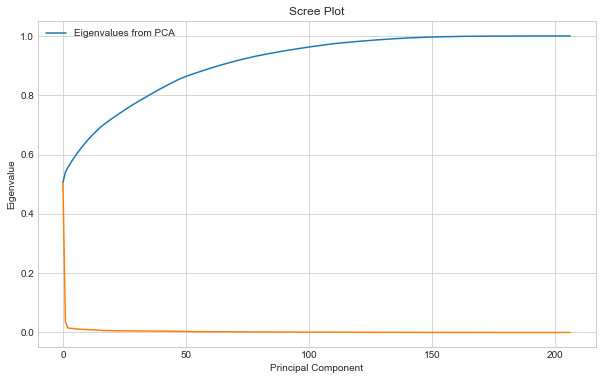

In [42]:
# feature extraction
from sklearn.decomposition import PCA
pca = PCA().fit(train.drop(['target','ID_code'], axis=1))

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')  
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
plt.grid(True)
plt.show()

In [43]:
# Using Stratified sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['target', 'ID_code'], axis=1), train['target'], test_size=0.3, random_state=147, stratify=train.target)
print('Shape:',X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape: (140000, 207) (60000, 207) (140000,) (60000,)


In [56]:
#Important Features:-
import eli5
eli5.show_weights(perm_imp,feature_names=X_test.columns.tolist(),top=200)

Weight,Feature
0.0188 ± 0.0003,var_139
0.0188 ± 0.0006,var_81
0.0124 ± 0.0004,var_44
0.0124 ± 0.0007,var_110
0.0122 ± 0.0010,var_148
0.0120 ± 0.0006,var_12
0.0097 ± 0.0004,var_190
0.0091 ± 0.0006,var_53
0.0091 ± 0.0002,var_166
0.0074 ± 0.0004,var_34


In [61]:
#Training data-

lgb_train=lgb.Dataset(X_train,label=y_train)

#Validation data-
lgb_valid=lgb.Dataset(X_test,label=y_test)

In [62]:
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [63]:
#Training lgbm model:-
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.942342	valid_1's auc: 0.884807
[2000]	training's auc: 0.961638	valid_1's auc: 0.889593
[3000]	training's auc: 0.975112	valid_1's auc: 0.891346
[4000]	training's auc: 0.984388	valid_1's auc: 0.891906
[5000]	training's auc: 0.990609	valid_1's auc: 0.891883
[6000]	training's auc: 0.994589	valid_1's auc: 0.891802
[7000]	training's auc: 0.997031	valid_1's auc: 0.891694
[8000]	training's auc: 0.998471	valid_1's auc: 0.891447
[9000]	training's auc: 0.999256	valid_1's auc: 0.891198
Early stopping, best iteration is:
[4740]	training's auc: 0.989236	valid_1's auc: 0.892031


In [64]:

#Predict the model:-

#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)

#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
len(lgbm_predict_prob)
print(lgbm_predict)

[0.00673259 0.14954293 0.04506344 ... 0.45313392 0.09315998 0.06749534]
[0 0 0 ... 0 0 0]


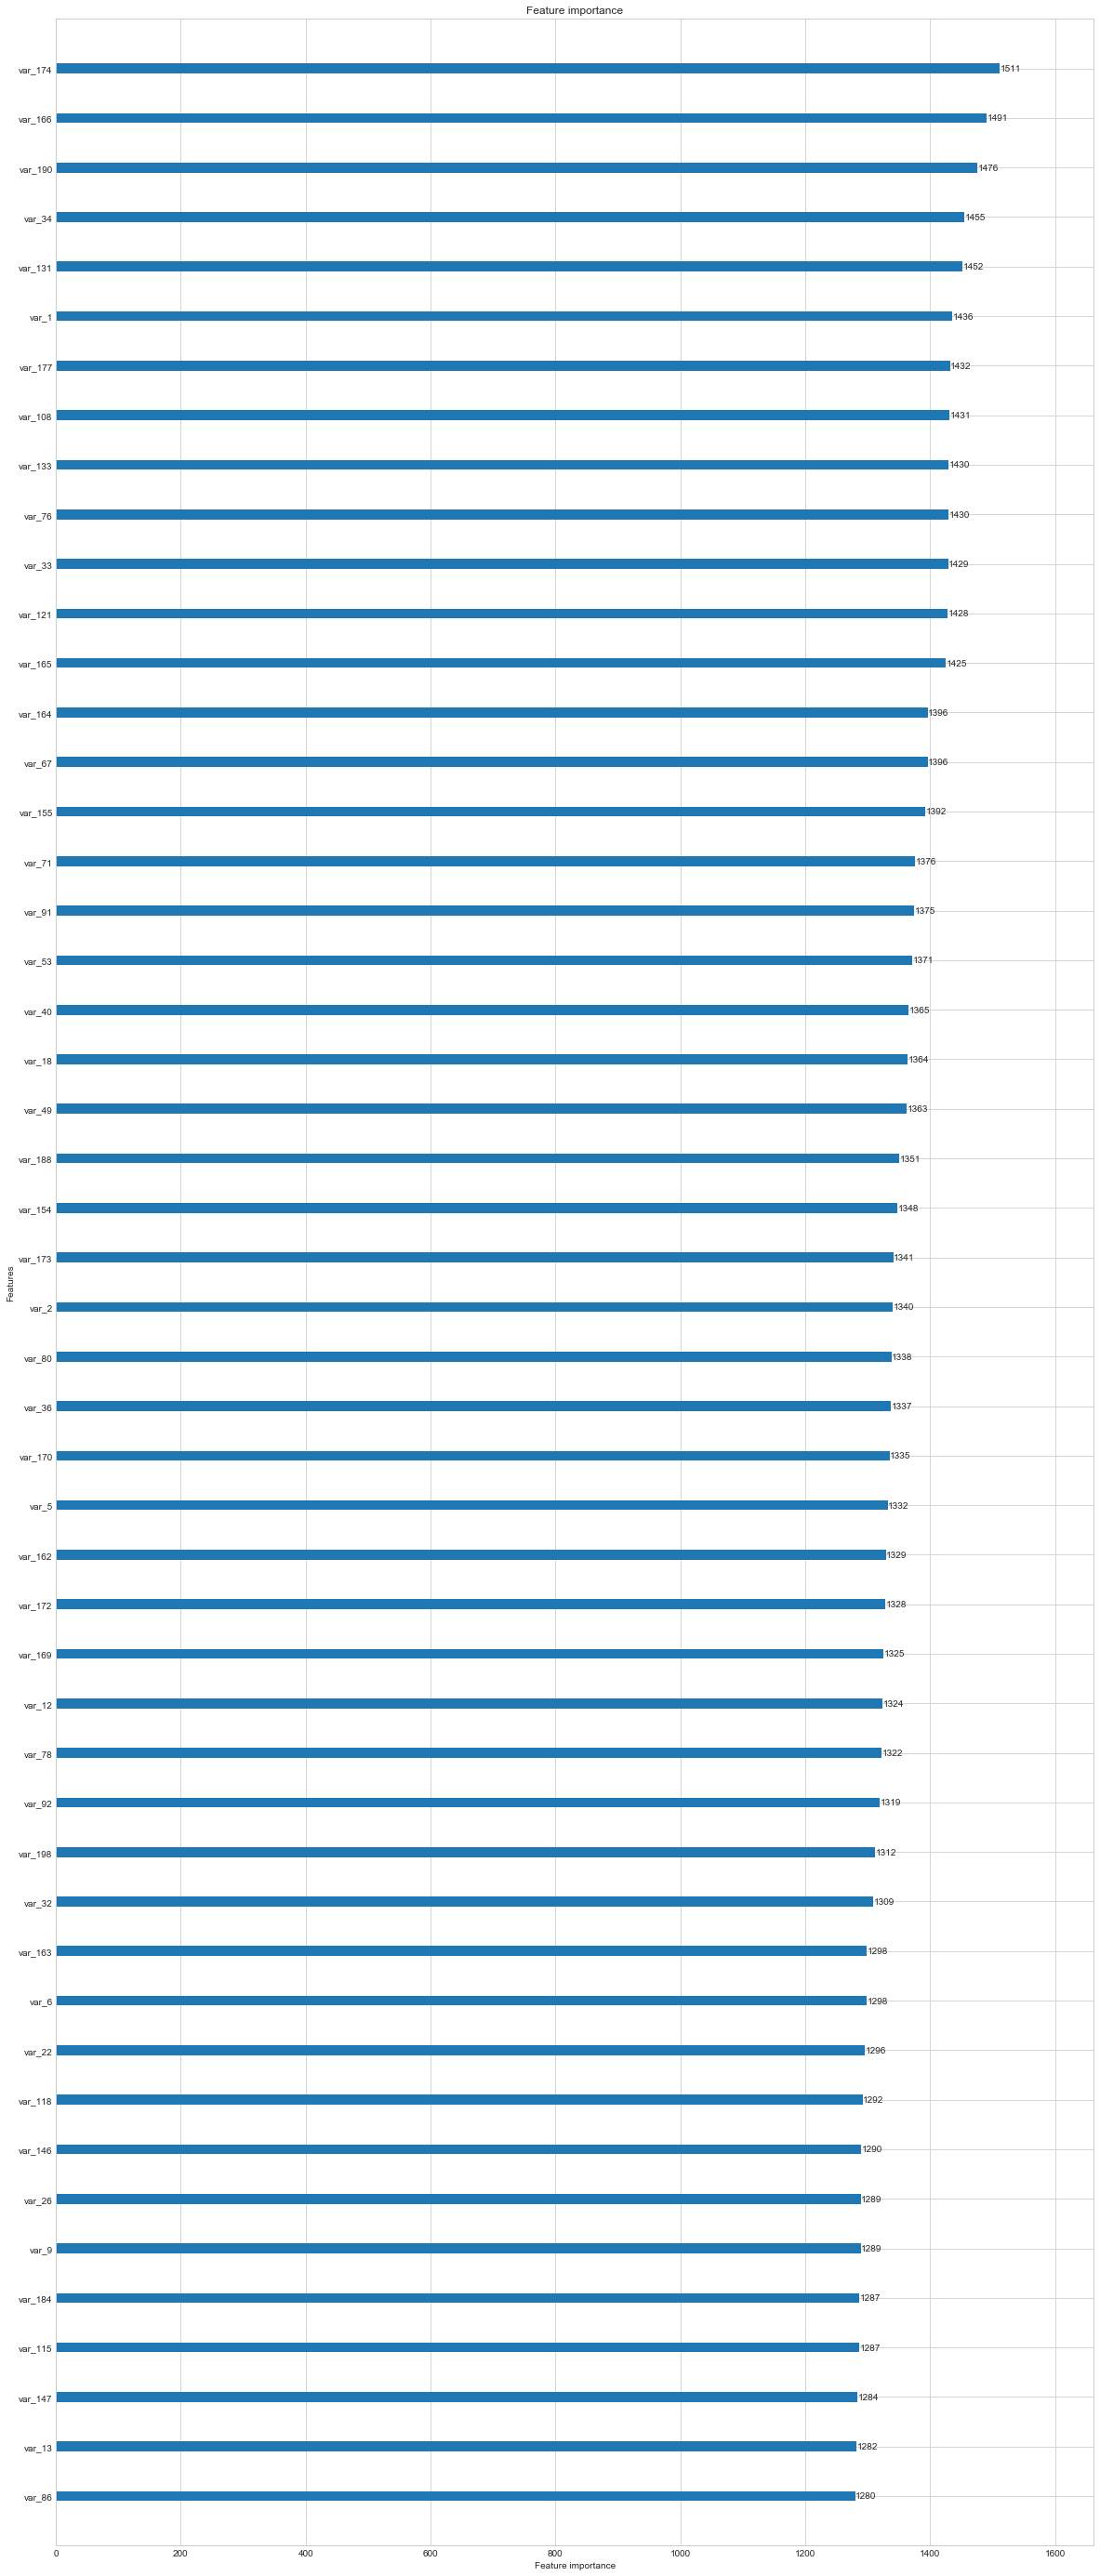

In [65]:
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

In [71]:
final=pd.read_csv('test.csv')

In [72]:
final.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [77]:
submission = pd.DataFrame({"lgbm_predict_prob": lgbm_predict_prob},columns = ['lgbm_predict_prob'])

In [78]:
submission1= pd.DataFrame({"lgbm_predict": lgbm_predict},columns = ['lgbm_predict'])

In [80]:
final['lgbm_predict_prob']=submission
final['lgbm_predict']=submission1

In [81]:
final.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,lgbm_predict_prob,lgbm_predict
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,0.006733,0.0
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,0.149543,0.0
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,0.045063,0.0
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,0.039754,0.0
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,0.814912,1.0


In [1]:
#loading libaries

!pip install eli5
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
random_state=147
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:/Users/spoorthi/Desktop/project2')
os.getcwd()

'C:\\Users\\spoorthi\\Desktop\\project2'

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(200000, 202)

In [5]:
# Using Stratified sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['target', 'ID_code'], axis=1), train['target'], test_size=0.3, random_state=147, stratify=train.target)
print('Shape:',X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape: (140000, 200) (60000, 200) (140000,) (60000,)


In [6]:
# importing classifiers
from sklearn.tree import DecisionTreeClassifier


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [19]:
models = []
models.append(( 'LR' , LogisticRegression(solver='liblinear')))
models.append(( 'CART' ,DecisionTreeClassifier ()))
models.append(( 'NB' , GaussianNB()))
models.append(('RFC', RandomForestClassifier()))

In [9]:
def cv_auc_score(models,scoring, num_folds=3):
    seed = 147 
    results = []
    names = []
    
    print('-> 3-Fold cross-validation ',scoring.__name__,'score for the training data for 4 classifiers.')
    for name, model in models:
        kfold = KFold( n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,verbose=3 ,scoring=make_scorer(scoring))
        results.append(cv_results)
        names.append(name)
        print("Algo: ", name,'::',np.mean(cv_results))
    
   

In [10]:
# AUC score
num_folds = 3
scoring=roc_auc_score
print("Scores without StandardScale")
cv_auc_score(models, scoring=scoring, num_folds=num_folds)

Scores without StandardScale
-> 3-Fold cross-validation  roc_auc_score score for the training data for 4 classifiers.
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.624, total= 1.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] .................................... , score=0.628, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.5min remaining:    0.0s


[CV] .................................... , score=0.628, total= 1.9min
Algo:  LR :: 0.6264835546403751
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.559, total= 2.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV] .................................... , score=0.562, total= 2.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.1min remaining:    0.0s


[CV] .................................... , score=0.561, total=10.0min
Algo:  CART :: 0.5605205214209749
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.668, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... , score=0.675, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .................................... , score=0.679, total=   1.0s
Algo:  NB :: 0.6741809150880748
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.500, total= 7.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min remaining:    0.0s


[CV] .................................... , score=0.500, total= 7.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 14.4min remaining:    0.0s


[CV] .................................... , score=0.500, total= 7.3min
Algo:  RFC :: 0.5001406039841858


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 21.8min finished


In [15]:
# Accuracy score
scoring =  accuracy_score
print("Scores without StandardScale")
cv_auc_score(models, scoring=scoring, num_folds=num_folds)

Scores without StandardScale
-> 3-Fold cross-validation  accuracy_score score for the training data for 4 classifiers.
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.911, total= 2.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV] .................................... , score=0.916, total= 2.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.2min remaining:    0.0s


[CV] .................................... , score=0.913, total= 2.0min
Algo:  LR :: 0.9136142831544322
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.831, total= 2.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] .................................... , score=0.838, total= 3.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.6min remaining:    0.0s


[CV] .................................... , score=0.834, total= 2.9min
Algo:  CART :: 0.834328570085126
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.919, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.923, total=   1.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] .................................... , score=0.922, total=   1.1s
Algo:  NB :: 0.9213500026450546
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.899, total= 9.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.2min remaining:    0.0s


[CV] .................................... , score=0.902, total= 9.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 18.6min remaining:    0.0s


[CV] .................................... , score=0.898, total=11.6min
Algo:  RFC :: 0.8995214183060002


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 30.1min finished


In [16]:
def classification_report_models(models,X_train, X_test, y_train, y_test ):
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(name, ':\n', confusion_matrix(y_test, y_pred))
        print(name,':\n',classification_report(y_test, y_pred))

In [20]:
print(" without StandardScale")

classification_report_models(models=models, X_train = X_train, X_test= X_test, y_train=y_train, y_test=y_test)

 without StandardScale
LR :
 [[53248   723]
 [ 4434  1595]]
LR :
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53971
           1       0.69      0.26      0.38      6029

    accuracy                           0.91     60000
   macro avg       0.81      0.63      0.67     60000
weighted avg       0.90      0.91      0.90     60000

CART :
 [[48819  5152]
 [ 4770  1259]]
CART :
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     53971
           1       0.20      0.21      0.20      6029

    accuracy                           0.83     60000
   macro avg       0.55      0.56      0.56     60000
weighted avg       0.84      0.83      0.84     60000

NB :
 [[53105   866]
 [ 3860  2169]]
NB :
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     53971
           1       0.71      0.36      0.48      6029

    accuracy              

In [21]:
tr_X = train.drop([ 'ID_code'], axis=1)
test_X = test.drop(['ID_code'], axis=1)
for col in tr_X.drop(['target'], axis=1).columns:
    tr_X[col] = ((tr_X[col] - tr_X[col].mean()) / tr_X[col].std()).astype('float32')
for col in test_X.columns:
    test_X[col] = ((test_X[col] - test_X[col].mean()) / test_X[col].std()).astype('float32')
  

#Training data
X=tr_X.drop(['target'],axis=1)
Y=train['target']
#StratifiedKFold cross validator
cv=StratifiedKFold(n_splits=5,random_state=147,shuffle=True)
for train_index,valid_index in cv.split(X,Y):
    X_train1, X_valid=X.iloc[train_index], X.iloc[valid_index]
    y_train1, y_valid=Y.iloc[train_index], Y.iloc[valid_index]

print('Shape of X_train :',X_train1.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train1.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160000, 200)
Shape of X_valid : (40000, 200)
Shape of y_train : (160000,)
Shape of y_valid : (40000,)


In [22]:
#Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=147)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train1,y_train1)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

In [23]:
def classification_report_models(models,X_train = X_smote, X_test= X_smote_v, y_train=y_smote, y_test=y_smote_v):
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(name, ':\n', confusion_matrix(y_test, y_pred))
        print(name,':\n',classification_report(y_test, y_pred))

In [25]:

classification_report_models(models=models, X_train = X_smote, X_test= X_smote_v, y_train=y_smote, y_test=y_smote_v)

LR :
 [[28535  7445]
 [ 7688 28292]]
LR :
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     35980
           1       0.79      0.79      0.79     35980

    accuracy                           0.79     71960
   macro avg       0.79      0.79      0.79     71960
weighted avg       0.79      0.79      0.79     71960

CART :
 [[26718  9262]
 [18362 17618]]
CART :
               precision    recall  f1-score   support

           0       0.59      0.74      0.66     35980
           1       0.66      0.49      0.56     35980

    accuracy                           0.62     71960
   macro avg       0.62      0.62      0.61     71960
weighted avg       0.62      0.62      0.61     71960

NB :
 [[34250  1730]
 [ 7578 28402]]
NB :
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     35980
           1       0.94      0.79      0.86     35980

    accuracy                           0.87     7

In [17]:
 !pip install lightgbm

In [26]:
import lightgbm as lgb

In [27]:
#Training the model with simple train_test_split stratified data
#training data

lgb_train=lgb.Dataset(X_train,label=y_train)
#validation data
lgb_valid=lgb.Dataset(X_test,label=y_test)

In [28]:
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [29]:

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

evals_result = {}

In [30]:
num_rounds=1000
lgbm1= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],feval=lgb_f1_score,verbose_eval=100,early_stopping_rounds = 500)

Training until validation scores don't improve for 500 rounds
[100]	training's auc: 0.90473	training's f1: 0.501978	valid_1's auc: 0.861808	valid_1's f1: 0.453369
[200]	training's auc: 0.916043	training's f1: 0.520313	valid_1's auc: 0.871636	valid_1's f1: 0.463072
[300]	training's auc: 0.921524	training's f1: 0.530338	valid_1's auc: 0.874694	valid_1's f1: 0.471082
[400]	training's auc: 0.925516	training's f1: 0.538659	valid_1's auc: 0.877351	valid_1's f1: 0.475187
[500]	training's auc: 0.929301	training's f1: 0.544808	valid_1's auc: 0.879744	valid_1's f1: 0.476082
[600]	training's auc: 0.933148	training's f1: 0.550923	valid_1's auc: 0.881459	valid_1's f1: 0.481687
[700]	training's auc: 0.935784	training's f1: 0.555645	valid_1's auc: 0.882739	valid_1's f1: 0.484115
[800]	training's auc: 0.938713	training's f1: 0.562333	valid_1's auc: 0.884134	valid_1's f1: 0.486005
[900]	training's auc: 0.941561	training's f1: 0.570638	valid_1's auc: 0.885102	valid_1's f1: 0.489819
[1000]	training's auc

In [31]:
print('Confusion matrix: Simple Lightgbm')
confusion_matrix(y_test, lgbm1.predict(X_test).round())


Confusion matrix: Simple Lightgbm


array([[46422,  7549],
       [ 1609,  4420]], dtype=int64)

In [32]:
#Training the model with StratifiedKFold()+SMOTE() data
#training data
lgb_train2=lgb.Dataset(X_smote,label=y_smote)
#validation data
lgb_valid2=lgb.Dataset(X_smote_v,label=y_smote_v)

In [34]:
num_rounds=10000
lgbm3= lgb.train(params,lgb_train2,num_rounds,valid_sets=[lgb_train2,lgb_valid2],feval=lgb_f1_score,verbose_eval=1000,early_stopping_rounds = 5000)

Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.956207	training's f1: 0.885727	valid_1's auc: 0.93558	valid_1's f1: 0.854468
[2000]	training's auc: 0.969384	training's f1: 0.906972	valid_1's auc: 0.944535	valid_1's f1: 0.867009
[3000]	training's auc: 0.977196	training's f1: 0.920779	valid_1's auc: 0.948302	valid_1's f1: 0.871963
[4000]	training's auc: 0.982755	training's f1: 0.931635	valid_1's auc: 0.950366	valid_1's f1: 0.874556
[5000]	training's auc: 0.987019	training's f1: 0.940849	valid_1's auc: 0.951436	valid_1's f1: 0.875119
[6000]	training's auc: 0.990332	training's f1: 0.949184	valid_1's auc: 0.952014	valid_1's f1: 0.875143
[7000]	training's auc: 0.992891	training's f1: 0.957019	valid_1's auc: 0.952321	valid_1's f1: 0.875251
[8000]	training's auc: 0.99484	training's f1: 0.963922	valid_1's auc: 0.952444	valid_1's f1: 0.875006
[9000]	training's auc: 0.996309	training's f1: 0.97027	valid_1's auc: 0.95262	valid_1's f1: 0.874528
[10000]	traini

In [35]:
# confusion matrix
print('Confusion matrix: SMOTE Lightgbm')
confusion_matrix(y_test, lgbm3.predict(X_test).round())
#plot_roc(y_test,  lgbm3.predict(X_test).round(), name='SMOTE LightGBM')

Confusion matrix: SMOTE Lightgbm


array([[53971,     0],
       [ 6029,     0]], dtype=int64)

In [36]:

#final submission

X_test=test.drop(['ID_code'],axis=1)
#predict the model, probability predictions
lightgbm_predict_prob3=lgbm3.predict(X_test,random_state=42,num_iteration=lgbm3.best_iteration)
lightgbm_predict_prob1=lgbm1.predict(X_test,random_state=42,num_iteration=lgbm1.best_iteration)

#Convert to binary output 1 or 0
lightgbm_predict3=lightgbm_predict_prob3.round()
lightgbm_predict1=lightgbm_predict_prob1.round()

In [37]:
submit=pd.DataFrame({'ID_code':test['ID_code'].values})
submit1=pd.DataFrame({'ID_code':test['ID_code'].values})

#submit['lightgbm_predict_prob']=lightgbm_predict_prob3
submit['target']=lightgbm_predict3.astype(int)
submit1['target']=lightgbm_predict1.astype(int)

submit.to_csv('submission.csv',index=False)
submit1.to_csv('submission1.csv',index=False)



,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [39]:
submit1.head()

,ID_code,target
0,test_0,0
1,test_1,1
2,test_2,1
3,test_3,1
4,test_4,0


In [38]:
submit.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
